In [1]:
using CSV
using DataFrames
using LaTeXStrings
using Plots; pgfplotsx()
using Statistics

In [2]:
df_filters = CSV.read("csv/nonsparse_scaling_vs_sparse_nonscaling_processed.csv", DataFrame)
df_grad    = CSV.read("csv/nonsparse_scaling_vs_sparse_nonscaling_grad_processed.csv", DataFrame);

In [3]:
dim_rng = [8 * 2^i for i in 0:8]

9-element Vector{Int64}:
    8
   16
   32
   64
  128
  256
  512
 1024
 2048

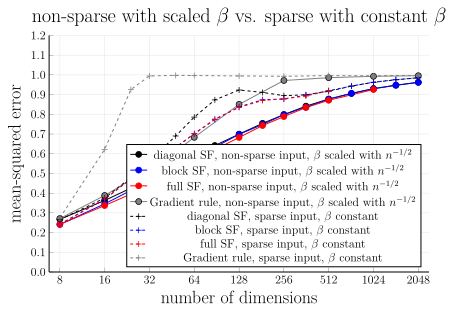

In [4]:
data = filter(row -> row.filter == "DiagSF" && row.sparse_input == false, df_filters)
sort!(data, order(:dim))
p = plot(
    data[:, :dim], data[:, :mse_mean], 
    label       = L"diagonal SF, non-sparse input, $\beta$ scaled with $n^{-1/2}$", 
    color       = "black",    
    markershape = :circle,
    legend      = :bottomright,
    xscale      = :log2,
    xticks      = dim_rng,
    xformatter  = x->Int(x),
    ylims       = (0, 1),
    yticks      = 0:0.1:1,
    xlabel      = "number of dimensions",
    ylabel      = "mean-squared error",
    title       = "non-sparse with scaled β vs. sparse with constant β",
    titlefont   = (20,),
    tickfont    = (12,),
    guidefont   = (18,),
    legendfontsize = 12
)
data = filter(row -> row.filter == "BlockSF" && row.sparse_input == false, df_filters)
sort!(data, order(:dim))
plot!(
    data[:, :dim], data[:, :mse_mean], 
    label             = L"block SF, non-sparse input, $\beta$ scaled with $n^{-1/2}$", 
    color             = "blue", 
    markerstrokecolor = "blue",
    markershape       = :circle
)
data = filter(row -> row.filter == "FullSF" && row.sparse_input == false, df_filters)
sort!(data, order(:dim))
plot!(
    data[:, :dim], data[:, :mse_mean], 
    label             = L"full SF, non-sparse input, $\beta$ scaled with $n^{-1/2}$", 
    color             = "red",
    markerstrokecolor = "red",
    markershape       = :circle
)
data = filter(row -> row.filter == "GradientRule" && row.sparse_input == false, df_grad)
sort!(data, order(:dim))
plot!(
    data[:, :dim], data[:, :mse_mean_minimum], 
    label       = L"Gradient rule, non-sparse input, $\beta$ scaled with $n^{-1/2}$", 
    color       = "gray",    
    markershape = :circle,
    legend      = :bottomright,
    xscale      = :log2,
    xticks      = dim_rng,
    xformatter  = x->Int(x),
    ylims       = (0, 1.2),
    yticks      = 0:0.1:1.2,
    xlabel      = "number of dimensions",
    ylabel      = "mean-squared error",
    title       = "non-sparse with scaled β vs. sparse with constant β"
)

data = filter(row -> row.filter == "DiagSF" && row.sparse_input == true, df_filters)
sort!(data, order(:dim))
plot!(
    data[:, :dim], data[:, :mse_mean], 
    label             = "diagonal SF, sparse input, β constant", 
    color             = "black", 
    linestyle         = :dash,
    markershape       = :cross
)
data = filter(row -> row.filter == "BlockSF" && row.sparse_input == true, df_filters)
sort!(data, order(:dim))
plot!(
    data[:, :dim], data[:, :mse_mean], 
    label             = "block SF, sparse input, β constant", 
    color             = "blue", 
    linestyle         = :dash,
    markershape       = :cross,
    markerstrokecolor = "blue",
)
data = filter(row -> row.filter == "FullSF" && row.sparse_input == true, df_filters)
sort!(data, order(:dim))
plot!(
    data[:, :dim], data[:, :mse_mean], 
    label             = "full SF, sparse input, β constant", 
    color             = "red",
    linestyle         = :dash,
    markerstrokecolor = "red",
    markershape       = :cross
)
data = filter(row -> row.filter == "GradientRule" && row.sparse_input == true, df_grad)
sort!(data, order(:dim))
plot!(
    data[:, :dim], data[:, :mse_mean_minimum], 
    label             = "Gradient rule, sparse input, β constant", 
    color             = "gray", 
    markerstrokecolor = "gray",
    linestyle         = :dash,
    markershape       = :cross
)

In [5]:
savefig("fig/nonsparse_scaling_vs_sparse_nonscaling_ALL.pdf")

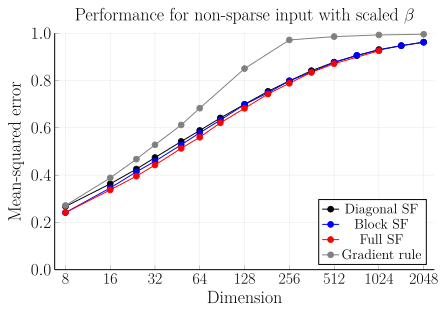

In [6]:
data = filter(row -> row.filter == "DiagSF" && row.sparse_input == false, df_filters)
sort!(data, order(:dim))
p = plot(
    data[:, :dim], data[:, :mse_mean], 
    label       = "Diagonal SF", 
    color       = "black",    
    markershape = :circle,
    legend      = :bottomright,
    xscale      = :log2,
    xticks      = dim_rng,
    xformatter  = x->Int(x),
    #xlims       = (8, 1024),
    ylims       = (0, 1),
    yticks      = 0:0.2:1,
    xlabel      = "Dimension",
    ylabel      = "Mean-squared error",
    title       = "Performance for non-sparse input with scaled β",
    titlefont   = (18,),
    tickfont    = (16,),
    guidefont   = (18,),
    legendfontsize = 14
)
data = filter(row -> row.filter == "BlockSF" && row.sparse_input == false, df_filters)
sort!(data, order(:dim))
plot!(
    data[:, :dim], data[:, :mse_mean], 
    label             = "Block SF", 
    color             = "blue", 
    markerstrokecolor = "blue",
    markershape       = :circle
)
data = filter(row -> row.filter == "FullSF" && row.sparse_input == false, df_filters)
sort!(data, order(:dim))
plot!(
    data[:, :dim], data[:, :mse_mean], 
    label             = "Full SF", 
    color             = "red",
    markerstrokecolor = "red",
    markershape       = :circle
)
data = filter(row -> row.filter == "GradientRule" && row.sparse_input == false, df_grad)
sort!(data, order(:dim))
plot!(
    data[:, :dim], data[:, :mse_mean_minimum], 
    label             = "Gradient rule", 
    color             = "gray",    
    markerstrokecolor = "gray",
    markershape       = :circle
)

In [7]:
savefig("fig/nonsparse_scaling_vs_sparse_nonscaling_ALL_nonsparse.pdf")

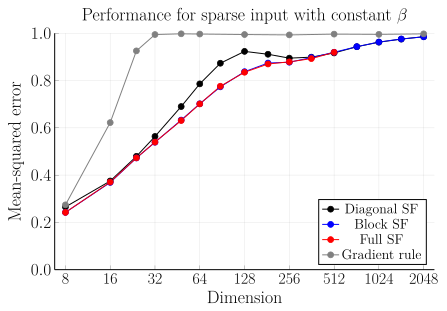

In [8]:
data = filter(row -> row.filter == "DiagSF" && row.sparse_input == true, df_filters)
sort!(data, order(:dim))
p = plot(
    data[:, :dim], data[:, :mse_mean], 
    label       = "Diagonal SF", 
    color       = "black",    
    markershape = :circle,
    legend      = :bottomright,
    xscale      = :log2,
    xticks      = dim_rng,
    xformatter  = x->Int(x),
    #xlims       = (8, 1024),
    ylims       = (0, 1),
    yticks      = 0:0.2:1,
    xlabel      = "Dimension",
    ylabel      = "Mean-squared error",
    title       = "Performance for sparse input with constant β",
    titlefont   = (18,),
    tickfont    = (16,),
    guidefont   = (18,),
    legendfontsize = 14
)
data = filter(row -> row.filter == "BlockSF" && row.sparse_input == true, df_filters)
sort!(data, order(:dim))
plot!(
    data[:, :dim], data[:, :mse_mean], 
    label             = "Block SF", 
    color             = "blue", 
    markerstrokecolor = "blue",
    markershape       = :circle
)
data = filter(row -> row.filter == "FullSF" && row.sparse_input == true, df_filters)
sort!(data, order(:dim))
plot!(
    data[:, :dim], data[:, :mse_mean], 
    label             = "Full SF", 
    color             = "red",
    markerstrokecolor = "red",
    markershape       = :circle
)
data = filter(row -> row.filter == "GradientRule" && row.sparse_input == true, df_grad)
sort!(data, order(:dim))
plot!(
    data[:, :dim], data[:, :mse_mean_minimum], 
    label             = "Gradient rule", 
    color             = "gray",    
    markerstrokecolor = "gray",
    markershape       = :circle
)

In [9]:
savefig("fig/nonsparse_scaling_vs_sparse_nonscaling_ALL_sparse.pdf")